In [1]:
# To install matlab, run pip install matlab
# To install matlab engine, run pip install 'matlabengine == 9.13.7'

import numpy as np
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA


In [2]:
mat = loadmat('tsd180.mat')
d = mat['days']
p = mat['pm']
n = mat['nmss']
[N,M] = np.shape(p)

Data = pd.DataFrame({'days': d[:,0]})
for i in range(M):
    Datai = pd.DataFrame({n[i,0][0] : p[:,i]})
    Data = pd.concat([Data,Datai],axis=1)

DataETFs = Data[['spy', 'xle', 'xlf', 'xli', 'xlk', 'xlp', 'xlu', 'xlv', 'xly', 'xom', 'xrx']]
DataETFsReturns = DataETFs.diff()
DataETFsReturns = DataETFsReturns.drop(index = 0)
DataETFsReturns.insert(0, 'days', d[1:])
DataETFs.insert(0, 'days', d)
DataETFsReturns['days'] = pd.to_datetime(DataETFsReturns['days'], format='%Y%m%d')

X = DataETFsReturns.iloc[:,1:].values

#DataETFs.head(10)



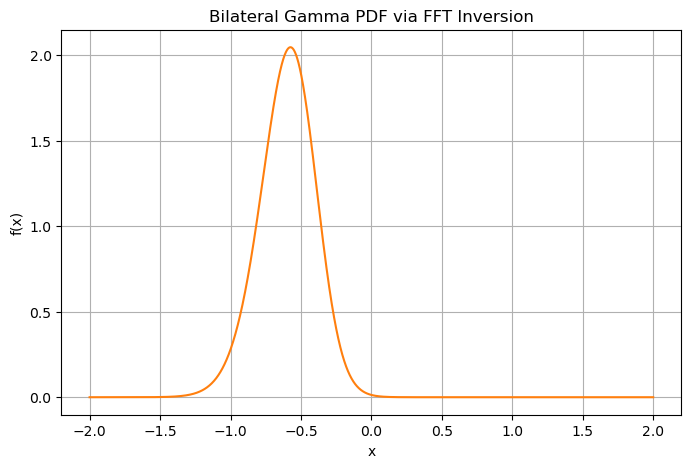

In [14]:
from Models import BG
params=[0.04, 5.0, 0.04, 20.0]
bp, cp, bn, cn = params
bg = BG(bp = bp, cp = cp, bn = bn, cn = cn, N = 4096, Xmax = 2)
bg.plot_pdf()

In [3]:
max_iter = 500
tol = 0.1

transformer = FastICA(n_components=10,
        random_state=0,
        whiten='unit-variance',
        max_iter = max_iter,
        tol = tol)

X_transformed = {}
W = {}
A = {}
lookbackperiod = 63
Failed = list()
for i in range(lookbackperiod,N):
        X_transformed[DataETFsReturns['days'][i]] = transformer.fit_transform(X[i-lookbackperiod:i])
        W[DataETFsReturns['days'][i]] = transformer.components_
        A[DataETFsReturns['days'][i]] = transformer.mixing_
        if transformer.n_iter_ >= max_iter:
                Failed.append(d[i])

c:\Users\yoshi\anaconda3\envs\nenv\lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\yoshi\anaconda3\envs\nenv\lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\yoshi\anaconda3\envs\nenv\lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\yoshi\anaconda3\envs\nenv\lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\yoshi\anaconda3\envs\nenv\lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: 

In [4]:
print(len(Failed))

31


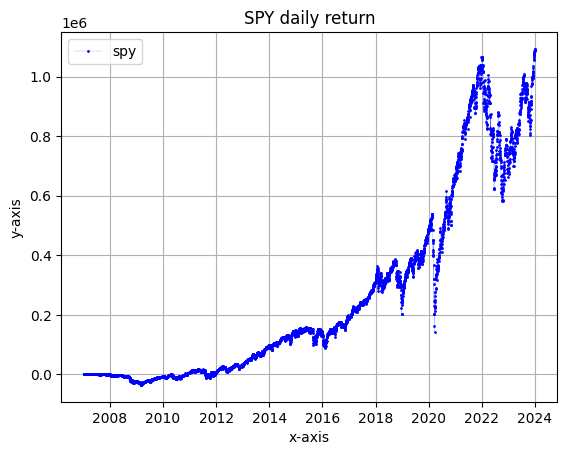

In [16]:
def setzero(arr: np.array, k: int) -> np.array:
    new = np.zeros(np.shape(arr))
    new[k+1:] = arr[k+1:]
    return new



x = DataETFsReturns['days']
y = DataETFsReturns['spy'].cumsum()
for i in range(1,N):
    y[i:] += DataETFsReturns['spy'][i:].cumsum()


# Create the plot
plt.plot(x, y, label='spy', color='blue', linestyle='-', linewidth=0.1, marker='o', markersize=1)

# Add labels and title
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('SPY daily return')

# Add legend
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()
